In [1]:
import pandas as pd
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
import math

## Importation des données

In [2]:
df2 = pd.read_csv("csv/Questionnaires.csv",sep=";")

In [3]:
df2.head()

,AGE,ID_NUM_TEL,SEXE,NIVEAU_SUPERIEUR_CHOIX,TYPE_TELEPHONE,ABONNEMENT_ILLIMITE,TEMPS_UTILISATION_SMS,ENVOI_SMS_SEMAINE,UTILISATION_T9,DESTINATAIRE_AMIS,DESTINATAIRE_COLLEGUES,DESTINATAIRE_FAMILLE,DESTINATAIRE_COMPAGNON,DUREE_LECTURE
0,16,202,Femme,lycee,classique,non,1 a 3,moins de 5,non,5,3,4,0,"4,19"
1,11,401,Homme,college,autre,oui,moins de 1,20 a 50,non,6,0,1,0,"5,24"
2,15,290,Homme,college,blackberry,non,1 a 3,plus de 100,oui,6,0,6,6,"3,14"
3,12,271,Homme,college,blackberry,oui,1 a 3,plus de 100,non,5,0,2,6,"1,05"
4,14,75,Femme,college,blackberry,oui,plus de 5,plus de 100,non,6,0,2,0,"6,29"


In [4]:
df = pd.read_csv("csv/BDD_sms.csv",sep=";") # on a un pb d'encodage pour certaines lettres --'
df = df[df["SMS_ANON"].notna()]

In [5]:
df.head()

,NUM_SMS,ID_NUM_TEL,SMS_ANON
0,1,477,Hey ca va?\r\nAlors cette rentree?\r\nVa fallo...
1,2,477,Ok super merci! Oui j'y comprends rien du tout...
2,3,477,Coucou !\r\nC'est quand la feria de Nimes?\r\n...
3,4,477,Coucou :)\r\nOui ca c'est bien passe!\r\nAlors...
4,5,477,On peut se rejoindre quelque part? Tu as cours...


## Merge des sms avec les données utilisateurs

In [6]:
df = df.merge(df2, how='left', on='ID_NUM_TEL') # On fusionne les deux dataframes par rapport à leur colonnes ID_NUM_TEL

## Création des corpus SEXE

In [7]:
corpus_sexe = df[["SMS_ANON","SEXE"]] # Selection des bonnes colonnes 
corpus_Femme=corpus_sexe.query("SEXE=='Femme'")
corpus_Homme=corpus_sexe.query("SEXE=='Homme'")


## Création des corpus AGE

In [8]:
from matplotlib import pyplot as plt
age = df["AGE"]
plt.hist(age)
plt.xlabel("Age")
plt.ylabel("Effectif")
plt.show()

<Figure size 640x480 with 1 Axes>

In [9]:
bins= [0,16.5,18.5,20.5,22.5,24.5,100] # Interval d'ages 
labels = [1,2,3,4,5,6] # Catégorie 
df["Agegroup"]=pd.cut(df['AGE'], bins=bins, labels=labels, right=False) # On crée une nouvelle colonnes avec les catégories


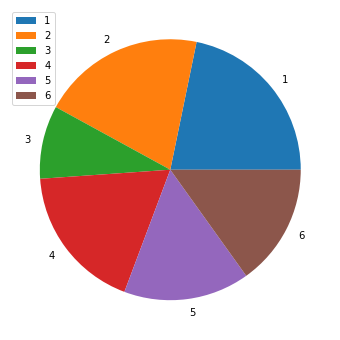

In [10]:
compte = df.groupby(["Agegroup"]).count() 
compte.plot.pie(y='ID_NUM_TEL', figsize=(6, 6)) 
plt.ylabel("")
plt.show()

In [11]:
corpus_age = df[["SMS_ANON","AGE","Agegroup"]] # Selection des bonnes colonnes 
corpus_age1=corpus_age.query('Agegroup==1')
corpus_age2=corpus_age.query('Agegroup==2')
corpus_age3=corpus_age.query('Agegroup==3')
corpus_age4=corpus_age.query('Agegroup==4')
corpus_age5=corpus_age.query('Agegroup==5')

# Comptage des mots

### Listes des stop words en français

In [12]:
#stop_words = set(stopwords.words('French')) 

### Création d'un dataframe comptant les mots utilisés dans chaque corpus

In [13]:
vect = CountVectorizer() #vect = CountVectorizer(stop_words=stop_words)


In [14]:
vect.fit(df["SMS_ANON"]) # Création du bag of word


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

### Tokenization

In [15]:
F_word =  vect.transform(df[df["SEXE"]=='Femme']["SMS_ANON"]) # tokenisation des sms venant des femmes
H_word =  vect.transform(df[df["SEXE"]=='Homme']["SMS_ANON"]) # tokenisation des sms venant des hommes
age1_word =  vect.transform(df[df["Agegroup"]==1]["SMS_ANON"]) # tokenisation des sms venant du groupe d'âge N°1
age2_word =  vect.transform(df[df["Agegroup"]==2]["SMS_ANON"]) # tokenisation des sms venant du groupe d'âge N°2
age3_word =  vect.transform(df[df["Agegroup"]==3]["SMS_ANON"]) # tokenisation des sms venant du groupe d'âge N°3
age4_word =  vect.transform(df[df["Agegroup"]==4]["SMS_ANON"]) # tokenisation des sms venant du groupe d'âge N°4
age5_word =  vect.transform(df[df["Agegroup"]==5]["SMS_ANON"]) # tokenisation des sms venant du groupe d'âge N°5
age6_word =  vect.transform(df[df["Agegroup"]==6]["SMS_ANON"]) # tokenisation des sms venant du groupe d'âge N°6

### Comptage

In [16]:
### Tokenizationnb_F_word = F_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
nb_F_word = F_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
nb_H_word = H_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
nb_age1_word = age1_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
nb_age2_word = age2_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
nb_age3_word = age3_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
nb_age4_word = age4_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
nb_age5_word = age5_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
nb_age6_word = age6_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation


In [17]:
df_F = pd.DataFrame(nb_F_word, columns=vect.get_feature_names()) # création d'un dataframe regroupant le comptage pour FEMME
df_H = pd.DataFrame(nb_H_word, columns=vect.get_feature_names()) # création d'un dataframe regroupant le comptage pour homme
df_age1 = pd.DataFrame(nb_age1_word, columns=vect.get_feature_names()) 
df_age2 = pd.DataFrame(nb_age2_word, columns=vect.get_feature_names()) 
df_age3 = pd.DataFrame(nb_age3_word, columns=vect.get_feature_names()) 
df_age4 = pd.DataFrame(nb_age4_word, columns=vect.get_feature_names()) 
df_age5 = pd.DataFrame(nb_age5_word, columns=vect.get_feature_names()) 
df_age6 = pd.DataFrame(nb_age6_word, columns=vect.get_feature_names()) 

### Création d'un dataFrame pour l'ensemble des sous-corpus

In [18]:
frames = [df_F,df_H,df_age1,df_age2,df_age3,df_age4,df_age5,df_age6]
corp_lex_1tok = pd.concat(frames) # fusion des deux dataframes
corp_lex_1tok = corp_lex_1tok.reset_index(drop=True)
corp_lex_1tok=corp_lex_1tok.T
corp_lex_1tok = corp_lex_1tok.rename(columns={ corp_lex_1tok.columns[0]: "Femme",corp_lex_1tok.columns[1]: "Homme"
                                              ,corp_lex_1tok.columns[2]: "Age1"
                                       ,corp_lex_1tok.columns[3]: "Age2",corp_lex_1tok.columns[4]: "Age3"
                                       ,corp_lex_1tok.columns[5]: "Age4",corp_lex_1tok.columns[6]: "Age5"
                                       ,corp_lex_1tok.columns[7]: "Age6"}) # renommage des colonnes

In [19]:
corp_lex_1tok.head()

,Femme,Homme,Age1,Age2,Age3,Age4,Age5,Age6
00,7,7,4,0,0,0,1,9
000,11,8,1,4,1,4,5,4
002,1,0,0,0,0,1,0,0
007,0,1,0,0,0,1,0,0
00h,6,0,0,1,0,2,3,0


In [20]:
#corp_lex_1tok.to_csv("comptage_par_corpus.csv",index = True)


### Calcul TF

In [21]:
totaux=corp_lex_1tok.sum(axis=0)


In [22]:
corp_lex_1tok["TF_fem"] = corp_lex_1tok["Femme"] / totaux['Femme'] * 100
corp_lex_1tok["TF_hom"] = corp_lex_1tok["Homme"] / totaux['Homme'] * 100
corp_lex_1tok["TF_age1"] = corp_lex_1tok["Age1"] / totaux['Age1'] * 100
corp_lex_1tok["TF_age2"] = corp_lex_1tok["Age2"] / totaux['Age2'] * 100
corp_lex_1tok["TF_age3"] = corp_lex_1tok["Age3"] / totaux['Age3'] * 100
corp_lex_1tok["TF_age4"] = corp_lex_1tok["Age4"] / totaux['Age4'] * 100
corp_lex_1tok["TF_age5"] = corp_lex_1tok["Age5"] / totaux['Age5'] * 100
corp_lex_1tok["TF_age6"] = corp_lex_1tok["Age6"] / totaux['Age6'] * 100


corp_lex_1tok.head()

,Femme,Homme,Age1,Age2,Age3,Age4,Age5,Age6,TF_fem,TF_hom,TF_age1,TF_age2,TF_age3,TF_age4,TF_age5,TF_age6
00,7,7,4,0,0,0,1,9,0.000927,0.003166,0.002368,0.000000,0.000000,0.000000,0.000589,0.005320
000,11,8,1,4,1,4,5,4,0.001457,0.003619,0.000592,0.002227,0.001144,0.001989,0.002945,0.002364
002,1,0,0,0,0,1,0,0,0.000132,0.000000,0.000000,0.000000,0.000000,0.000497,0.000000,0.000000
007,0,1,0,0,0,1,0,0,0.000000,0.000452,0.000000,0.000000,0.000000,0.000497,0.000000,0.000000
00h,6,0,0,1,0,2,3,0,0.000795,0.000000,0.000000,0.000557,0.000000,0.000995,0.001767,0.000000


### Calcul IDF

In [23]:
SC_Sexe=2
SC_Age=6

In [24]:
A_age=[]
for tok in range(0,len(corp_lex_1tok)) :

    nb=0
    for corp in range(0,SC_Age) :
        if corp_lex_1tok.iloc[tok,2:8][corp]>0:
            nb=nb+1
    A_age.append(nb)

corp_lex_1tok["nb_in_corpAge"]=A_age


In [47]:
A_sexe=[]
for tok in range(0,len(corp_lex_1tok)) :

    nb=0
    for corp in range(0,SC_Sexe) :
        if corp_lex_1tok.iloc[tok,:2][corp]>0:
            nb=nb+1
    A_sexe.append(nb)

corp_lex_1tok["nb_in_corpSexe"]=A_sexe
corp_lex_1tok["nb_in_corpSexe"]=corp_lex_1tok["nb_in_corpSexe"]*2

In [40]:
corp_lex_1tok["IDF_Age"]=0
for tok in range(0,len(corp_lex_1tok)) :
    corp_lex_1tok["IDF_Age"][tok]=math.log(SC_Age / corp_lex_1tok["nb_in_corpAge"][tok])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
corp_lex_1tok["IDF_Sexe"]=0
for tok in range(0,len(corp_lex_1tok)) :
    corp_lex_1tok["IDF_Sexe"][tok]=math.log(SC_Sexe / corp_lex_1tok["nb_in_corpSexe"][tok])

In [48]:
corp_lex_1tok["nb_in_corpSexe"]

00        4
000       4
002       2
007       2
00h       2
         ..
τφαι      2
φοις      2
ωιλλ      2
ватаяъ    2
你好        2
Name: nb_in_corpSexe, Length: 38711, dtype: int64

In [50]:
corp_lex_1tok.head(100)

,Femme,Homme,Age1,Age2,Age3,Age4,Age5,Age6,TF_fem,TF_hom,...,IDF_Age,IDF_Sexe,TF_IDF_Femme,TF_IDF_Homme,TF_IDF_Age1,TF_IDF_Age2,TF_IDF_Age3,TF_IDF_Age4,TF_IDF_Age5,TF_IDF_Age6
00,7,7,4,0,0,0,1,9,0.000927,0.003166,...,0,1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
000,11,8,1,4,1,4,5,4,0.001457,0.003619,...,0,1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
002,1,0,0,0,0,1,0,0,0.000132,0.000000,...,1,1,0.0,0.0,0.000000,0.000000,0.000000,0.000497,0.000000,0.0
007,0,1,0,0,0,1,0,0,0.000000,0.000452,...,1,1,0.0,0.0,0.000000,0.000000,0.000000,0.000497,0.000000,0.0
00h,6,0,0,1,0,2,3,0,0.000795,0.000000,...,0,1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10h10,1,1,0,0,0,1,1,0,0.000132,0.000452,...,1,1,0.0,0.0,0.000000,0.000000,0.000000,0.000497,0.000589,0.0
10h15,4,2,0,0,2,2,1,1,0.000530,0.000905,...,0,1,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
10h16h,0,1,1,0,0,0,0,0,0.000000,0.000452,...,1,1,0.0,0.0,0.000592,0.000000,0.000000,0.000000,0.000000,0.0
10h20,1,2,2,1,0,0,0,0,0.000132,0.000905,...,1,1,0.0,0.0,0.001184,0.000557,0.000000,0.000000,0.000000,0.0


### Calcul TF-IDF

In [51]:
corp_lex_1tok["TF_IDF_Femme"]=corp_lex_1tok["TF_fem"]*corp_lex_1tok["IDF_Sexe"]
corp_lex_1tok["TF_IDF_Homme"]=corp_lex_1tok["TF_hom"]*corp_lex_1tok["IDF_Sexe"]
corp_lex_1tok["TF_IDF_Age1"]=corp_lex_1tok["TF_age1"]*corp_lex_1tok["IDF_Age"]
corp_lex_1tok["TF_IDF_Age2"]=corp_lex_1tok["TF_age2"]*corp_lex_1tok["IDF_Age"]
corp_lex_1tok["TF_IDF_Age3"]=corp_lex_1tok["TF_age3"]*corp_lex_1tok["IDF_Age"]
corp_lex_1tok["TF_IDF_Age4"]=corp_lex_1tok["TF_age4"]*corp_lex_1tok["IDF_Age"]
corp_lex_1tok["TF_IDF_Age5"]=corp_lex_1tok["TF_age5"]*corp_lex_1tok["IDF_Age"]
corp_lex_1tok["TF_IDF_Age6"]=corp_lex_1tok["TF_age6"]*corp_lex_1tok["IDF_Age"]

In [52]:
corp_lex_1tok.head(100)

,Femme,Homme,Age1,Age2,Age3,Age4,Age5,Age6,TF_fem,TF_hom,...,IDF_Age,IDF_Sexe,TF_IDF_Femme,TF_IDF_Homme,TF_IDF_Age1,TF_IDF_Age2,TF_IDF_Age3,TF_IDF_Age4,TF_IDF_Age5,TF_IDF_Age6
00,7,7,4,0,0,0,1,9,0.000927,0.003166,...,0,1,0.000927,0.003166,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
000,11,8,1,4,1,4,5,4,0.001457,0.003619,...,0,1,0.001457,0.003619,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
002,1,0,0,0,0,1,0,0,0.000132,0.000000,...,1,1,0.000132,0.000000,0.000000,0.000000,0.000000,0.000497,0.000000,0.0
007,0,1,0,0,0,1,0,0,0.000000,0.000452,...,1,1,0.000000,0.000452,0.000000,0.000000,0.000000,0.000497,0.000000,0.0
00h,6,0,0,1,0,2,3,0,0.000795,0.000000,...,0,1,0.000795,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10h10,1,1,0,0,0,1,1,0,0.000132,0.000452,...,1,1,0.000132,0.000452,0.000000,0.000000,0.000000,0.000497,0.000589,0.0
10h15,4,2,0,0,2,2,1,1,0.000530,0.000905,...,0,1,0.000530,0.000905,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
10h16h,0,1,1,0,0,0,0,0,0.000000,0.000452,...,1,1,0.000000,0.000452,0.000592,0.000000,0.000000,0.000000,0.000000,0.0
10h20,1,2,2,1,0,0,0,0,0.000132,0.000905,...,1,1,0.000132,0.000905,0.001184,0.000557,0.000000,0.000000,0.000000,0.0


### On peut maintenant afficher les mots les plus utilisés par une pop

In [53]:
corp_lex_1tok.sort_values("TF_age1",ascending = False).head(7)

,Femme,Homme,Age1,Age2,Age3,Age4,Age5,Age6,TF_fem,TF_hom,...,IDF_Age,IDF_Sexe,TF_IDF_Femme,TF_IDF_Homme,TF_IDF_Age1,TF_IDF_Age2,TF_IDF_Age3,TF_IDF_Age4,TF_IDF_Age5,TF_IDF_Age6
je,25076,6649,8568,6372,2627,4734,4616,4808,3.321707,3.007617,...,0,1,3.321707,3.007617,0.0,0.0,0.0,0.0,0.0,0.0
pas,17040,5265,4062,4220,2038,4933,3889,3163,2.257214,2.381577,...,0,1,2.257214,2.381577,0.0,0.0,0.0,0.0,0.0,0.0
de,17218,5305,3486,4264,2044,4428,4020,4281,2.280793,2.399671,...,0,1,2.280793,2.399671,0.0,0.0,0.0,0.0,0.0,0.0
est,13174,3904,3254,3467,1339,4172,2364,2482,1.745102,1.765941,...,0,1,1.745102,1.765941,0.0,0.0,0.0,0.0,0.0,0.0
tu,15268,4703,3225,4038,1983,3947,3425,3353,2.022485,2.127361,...,0,1,2.022485,2.127361,0.0,0.0,0.0,0.0,0.0,0.0
et,14367,3952,2966,3315,1869,3263,3624,3282,1.903133,1.787653,...,0,1,1.903133,1.787653,0.0,0.0,0.0,0.0,0.0,0.0
aime,3369,252,2573,276,228,287,66,191,0.446277,0.113990,...,0,1,0.446277,0.113990,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
corp_lex_1tok.sort_values("TF_IDF_Age1",ascending = False).head(7)

,Femme,Homme,Age1,Age2,Age3,Age4,Age5,Age6,TF_fem,TF_hom,...,IDF_Age,IDF_Sexe,TF_IDF_Femme,TF_IDF_Homme,TF_IDF_Age1,TF_IDF_Age2,TF_IDF_Age3,TF_IDF_Age4,TF_IDF_Age5,TF_IDF_Age6
psk,231,1,232,0,0,0,0,0,0.030600,0.000452,...,1,1,0.030600,0.000452,0.137365,0.0,0.0,0.000000,0.000000,0.000000
tqt,91,1,92,0,0,0,0,0,0.012054,0.000452,...,1,1,0.012054,0.000452,0.054472,0.0,0.0,0.000000,0.000000,0.000000
cé,0,76,76,0,0,0,0,0,0.000000,0.034378,...,1,1,0.000000,0.034378,0.044999,0.0,0.0,0.000000,0.000000,0.000000
ué,18,50,50,0,0,0,18,0,0.002384,0.022617,...,1,1,0.002384,0.022617,0.029605,0.0,0.0,0.000000,0.010602,0.000000
ak,37,1,37,0,0,0,0,1,0.004901,0.000452,...,1,1,0.004901,0.000452,0.021907,0.0,0.0,0.000000,0.000000,0.000591
pttr,36,0,36,0,0,0,0,0,0.004769,0.000000,...,1,1,0.004769,0.000000,0.021315,0.0,0.0,0.000000,0.000000,0.000000
wai,35,0,34,0,0,1,0,0,0.004636,0.000000,...,1,1,0.004636,0.000000,0.020131,0.0,0.0,0.000497,0.000000,0.000000


### Traitement du sms d'entrée

In [55]:
sms=["Odysséum ? Non mais j'ai pas le temps désolée :S j'vais le transférerà <PRE_7> mais moi je vais en ville acheter le pass et j'avais dis à ma pote depuis un moment qu'on se voyait aujourd'hui A ce soir, bisou <PRE_1>."]

In [56]:
sms_word =  vect.transform(sms) # tokenisation du nouvel sms
nb_sms_word = sms_word.sum(axis = 0) # On compte pour chaque mots son nombre utilisation
df_sms = pd.DataFrame(nb_sms_word, columns=vect.get_feature_names()) 
df_sms=df_sms.T
df_sms = df_sms.rename(columns={ df_sms.columns[0]: "New"}) 
tot=df_sms.sum(axis=0)
df_sms["coeff_new"] = df_sms["New"] / tot['New'] * 100
df_sms.sort_values("coeff_new",ascending = False).head(10)

,New,coeff_new
le,3,7.692308
mais,2,5.128205
vais,2,5.128205
je,1,2.564103
avais,1,2.564103
ai,1,2.564103
hui,1,2.564103
on,1,2.564103
moi,1,2.564103
en,1,2.564103


In [57]:
final=corp_lex_1tok.iloc[:,8:]
final['new_sms']=df_sms["coeff_new"]
#final['index'] = final.index
final.head()

final.corr()

,TF_fem,TF_hom,TF_age1,TF_age2,TF_age3,TF_age4,TF_age5,TF_age6,nb_in_corpAge,nb_in_corpSexe,...,IDF_Sexe,TF_IDF_Femme,TF_IDF_Homme,TF_IDF_Age1,TF_IDF_Age2,TF_IDF_Age3,TF_IDF_Age4,TF_IDF_Age5,TF_IDF_Age6,new_sms
TF_fem,1.000000,0.989548,0.965084,0.993709,0.988660,0.980562,0.981633,0.980302,0.157233,0.101974,...,NaN,1.000000,0.989548,-0.005335,-0.017039,-0.010063,-0.007799,-0.014314,-0.016648,0.423922
TF_hom,0.989548,1.000000,0.950433,0.988631,0.989074,0.972454,0.984597,0.975345,0.158155,0.106182,...,NaN,0.989548,1.000000,-0.006451,-0.018222,-0.011185,-0.012305,-0.010344,-0.017814,0.425225
TF_age1,0.965084,0.950433,1.000000,0.957863,0.944353,0.920386,0.923176,0.922951,0.140023,0.092429,...,NaN,0.965084,0.950433,0.012378,-0.016905,-0.010579,-0.011012,-0.013739,-0.017173,0.411117
TF_age2,0.993709,0.988631,0.957863,1.000000,0.985717,0.971557,0.975518,0.969580,0.150918,0.098222,...,NaN,0.993709,0.988631,-0.009181,-0.009068,-0.011300,-0.011709,-0.015092,-0.018290,0.414594
TF_age3,0.988660,0.989074,0.944353,0.985717,1.000000,0.963953,0.980637,0.975478,0.157335,0.102087,...,NaN,0.988660,0.989074,-0.009646,-0.019001,0.005432,-0.012240,-0.015899,-0.018970,0.418542
TF_age4,0.980562,0.972454,0.920386,0.971557,0.963953,1.000000,0.961107,0.954873,0.159668,0.103428,...,NaN,0.980562,0.972454,-0.009868,-0.019365,-0.012036,0.004599,-0.015960,-0.019438,0.434636
TF_age5,0.981633,0.984597,0.923176,0.975518,0.980637,0.961107,1.000000,0.967356,0.160694,0.105509,...,NaN,0.981633,0.984597,-0.009633,-0.019456,-0.012199,-0.012448,-0.002380,-0.019583,0.419453
TF_age6,0.980302,0.975345,0.922951,0.969580,0.975478,0.954873,0.967356,1.000000,0.163319,0.107337,...,NaN,0.980302,0.975345,-0.010190,-0.020013,-0.012323,-0.012861,-0.016600,-0.006208,0.402340
nb_in_corpAge,0.157233,0.158155,0.140023,0.150918,0.157335,0.159668,0.160694,0.163319,1.000000,0.765185,...,NaN,0.157233,0.158155,-0.059781,-0.112551,-0.071788,-0.072538,-0.087457,-0.114443,0.070395
nb_in_corpSexe,0.101974,0.106182,0.092429,0.098222,0.102087,0.103428,0.105509,0.107337,0.765185,1.000000,...,NaN,0.101974,0.106182,0.001872,-0.062999,-0.043955,-0.060554,-0.028958,-0.044662,0.046240


In [58]:
import numpy as np
import scipy.stats

corrF=scipy.stats.pearsonr(final['new_sms'], final['TF_IDF_Femme'])    # corr avec sms des femmes
corrH=scipy.stats.pearsonr(final['new_sms'], final['TF_IDF_Homme'])    # corr avec sms des hommes

max_sexe=max(corrF[0],corrH[0])
if corrF[0]==max_sexe:
    print("tu es une femme!")
else:
  print("tu es un homme!")


tu es un homme!


In [59]:
corr_age1=scipy.stats.pearsonr(final['new_sms'], final['TF_age1'])    # corr avec sms age1
corr_age2=scipy.stats.pearsonr(final['new_sms'], final['TF_age2'])    # corr avec sms age2
corr_age3=scipy.stats.pearsonr(final['new_sms'], final['TF_age3'])    # corr avec sms age3
corr_age4=scipy.stats.pearsonr(final['new_sms'], final['TF_age4'])    # corr avec sms age4
corr_age5=scipy.stats.pearsonr(final['new_sms'], final['TF_age5'])    # corr avec sms age5
corr_age6=scipy.stats.pearsonr(final['new_sms'], final['TF_age6'])    # corr avec sms age6

max_age=max(corr_age1[0],corr_age2[0],corr_age3[0],corr_age4[0],corr_age5[0],corr_age6[0])
if corr_age1[0]==max_age:
    print("tu as moins de 17 ans")
elif corr_age2[0]==max_age:
  print("tu as 17 ou 18 ans")
elif corr_age3[0]==max_age:
  print("tu as 19 ou 20 ans")
elif corr_age4[0]==max_age:
  print("tu as 21 ou 22 ans")
elif corr_age5[0]==max_age:
  print("tu as 23 ou 24 ans")
else:
  print("tu es vieux :O ^^")


tu as 21 ou 22 ans


In [38]:
final['diff_F']=final['new_sms']-final['TF_fem']
final['diff_H']=final['new_sms']-final['TF_hom']
final['diff_age1']=final['new_sms']-final['TF_age1']
final['diff_age2']=final['new_sms']-final['TF_age2']
final['diff_age3']=final['new_sms']-final['TF_age3']
final['diff_age4']=final['new_sms']-final['TF_age4']
final['diff_age5']=final['new_sms']-final['TF_age5']
final['diff_age6']=final['new_sms']-final['TF_age6']
final2=final.iloc[:,9:]
final2.head()

,nb_in_corpSexe,IDF_Age,IDF_Sexe,TF_IDF_Femme,TF_IDF_Homme,TF_IDF_Age1,TF_IDF_Age2,TF_IDF_Age3,TF_IDF_Age4,TF_IDF_Age5,TF_IDF_Age6,new_sms,diff_F,diff_H,diff_age1,diff_age2,diff_age3,diff_age4,diff_age5,diff_age6
00,2,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.000927,-0.003166,-0.002368,0.000000,0.000000,0.000000,-0.000589,-0.005320
000,2,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.001457,-0.003619,-0.000592,-0.002227,-0.001144,-0.001989,-0.002945,-0.002364
002,1,1,0,0.0,0.0,0.0,0.0,0.0,0.000497,0.0,0.0,0.0,-0.000132,0.000000,0.000000,0.000000,0.000000,-0.000497,0.000000,0.000000
007,1,1,0,0.0,0.0,0.0,0.0,0.0,0.000497,0.0,0.0,0.0,0.000000,-0.000452,0.000000,0.000000,0.000000,-0.000497,0.000000,0.000000
00h,1,0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,-0.000795,0.000000,0.000000,-0.000557,0.000000,-0.000995,-0.001767,0.000000


In [39]:
comp=final2.sum(axis=0)
comp

nb_in_corpSexe    4.874300e+04
IDF_Age           2.987600e+04
IDF_Sexe          0.000000e+00
TF_IDF_Femme      0.000000e+00
TF_IDF_Homme      0.000000e+00
TF_IDF_Age1       5.430065e+00
TF_IDF_Age2       4.232519e+00
TF_IDF_Age3       4.871965e+00
TF_IDF_Age4       4.889037e+00
TF_IDF_Age5       5.049976e+00
TF_IDF_Age6       5.869070e+00
new_sms           1.000000e+02
diff_F            1.677329e-13
diff_H            8.688473e-13
diff_age1         5.101961e-13
diff_age2         1.840091e-13
diff_age3         4.638273e-13
diff_age4         4.283041e-13
diff_age5        -1.461849e-13
diff_age6        -3.340522e-13
dtype: float64